## CMPINF 2110 Spring 2021 - Week 03

Tidying the Bob Ross data set from 538.

Article: https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/

Github: https://github.com/fivethirtyeight/data/tree/master/bob-ross

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read in the data

In [2]:
data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv'

df = pd.read_csv( data_url )

In [3]:
print( df.shape )

(403, 69)


In [4]:
df.columns

Index(['EPISODE', 'TITLE', 'APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH',
       'BOAT', 'BRIDGE', 'BUILDING', 'BUSHES', 'CABIN', 'CACTUS',
       'CIRCLE_FRAME', 'CIRRUS', 'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS',
       'DECIDUOUS', 'DIANE_ANDRE', 'DOCK', 'DOUBLE_OVAL_FRAME', 'FARM',
       'FENCE', 'FIRE', 'FLORIDA_FRAME', 'FLOWERS', 'FOG', 'FRAMED', 'GRASS',
       'GUEST', 'HALF_CIRCLE_FRAME', 'HALF_OVAL_FRAME', 'HILLS', 'LAKE',
       'LAKES', 'LIGHTHOUSE', 'MILL', 'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT',
       'OCEAN', 'OVAL_FRAME', 'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT',
       'RECTANGLE_3D_FRAME', 'RECTANGULAR_FRAME', 'RIVER', 'ROCKS',
       'SEASHELL_FRAME', 'SNOW', 'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STEVE_ROSS',
       'STRUCTURE', 'SUN', 'TOMB_FRAME', 'TREE', 'TREES', 'TRIPLE_FRAME',
       'WATERFALL', 'WAVES', 'WINDMILL', 'WINDOW_FRAME', 'WINTER',
       'WOOD_FRAMED'],
      dtype='object')

In [5]:
df.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


A zero in a column represents the FEATURE is NOT present in the painting. 

A one in a column represents the FEATURE is present in the painting.

We can SUM together the counts of each column easily.

In [6]:
df.MOUNTAIN.sum()

160

In [7]:
df.EPISODE

0      S01E01
1      S01E02
2      S01E03
3      S01E04
4      S01E05
        ...  
398    S31E09
399    S31E10
400    S31E11
401    S31E12
402    S31E13
Name: EPISODE, Length: 403, dtype: object

## Tidy episode labels

Does 1 row correspond to 1 episode (painting).

In [8]:
df.EPISODE.value_counts()

S19E10    1
S09E03    1
S18E10    1
S21E12    1
S27E07    1
         ..
S27E09    1
S11E12    1
S03E12    1
S09E13    1
S05E04    1
Name: EPISODE, Length: 403, dtype: int64

In [9]:
df.EPISODE.value_counts().value_counts()

1    403
Name: EPISODE, dtype: int64

In [10]:
df.shape[0]

403

The `EPISODE` value has a particular structure:

`S<nn>E<mm>`

Let's split the `EPISODE` string on the character `'E'`.

In [11]:
df.EPISODE.str.split( 'E' )

0      [S01, 01]
1      [S01, 02]
2      [S01, 03]
3      [S01, 04]
4      [S01, 05]
         ...    
398    [S31, 09]
399    [S31, 10]
400    [S31, 11]
401    [S31, 12]
402    [S31, 13]
Name: EPISODE, Length: 403, dtype: object

In [12]:
df_copy = df.copy()

df_copy[['season_word', 'episode']] = df.EPISODE.str.split( 'E', expand=True )

In [13]:
df_copy.loc[:, ['EPISODE', 'season_word', 'episode']]

,EPISODE,season_word,episode
0,S01E01,S01,01
1,S01E02,S01,02
2,S01E03,S01,03
3,S01E04,S01,04
4,S01E05,S01,05
...,...,...,...
398,S31E09,S31,09
399,S31E10,S31,10
400,S31E11,S31,11
401,S31E12,S31,12


Let's check how many episodes per season.

In [14]:
df_copy.season_word.value_counts()

S27    13
S06    13
S22    13
S17    13
S24    13
S13    13
S01    13
S18    13
S14    13
S03    13
S29    13
S25    13
S08    13
S10    13
S07    13
S30    13
S23    13
S16    13
S21    13
S28    13
S04    13
S20    13
S11    13
S12    13
S31    13
S05    13
S15    13
S09    13
S26    13
S02    13
S19    13
Name: season_word, dtype: int64

Or we can look at it graphically with a bar chart.

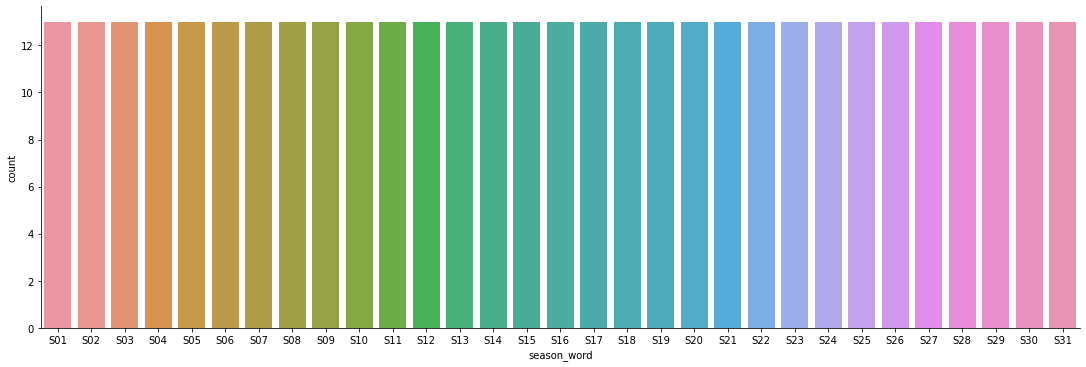

In [15]:
sns.catplot( data = df_copy, x='season_word', kind='count', aspect=3)

plt.show()

How can we extract the digits from `season_word`? Or, how can we remove the `'S'` character from the `season_word'`?

In [16]:
df_copy.season_word.str.split( 'S' )

0      [, 01]
1      [, 01]
2      [, 01]
3      [, 01]
4      [, 01]
        ...  
398    [, 31]
399    [, 31]
400    [, 31]
401    [, 31]
402    [, 31]
Name: season_word, Length: 403, dtype: object

### Regular Expression

Starting point if interested is the `re` module in Python:

https://docs.python.org/3/library/re.html

To "extract" an expression from a string we will use the `.str.extract()`.

In [17]:
df_copy.season_word

0      S01
1      S01
2      S01
3      S01
4      S01
      ... 
398    S31
399    S31
400    S31
401    S31
402    S31
Name: season_word, Length: 403, dtype: object

In [18]:
df_copy.season_word.str.extract( '([0])' )

,0
0,0
1,0
2,0
3,0
4,0
...,...
398,NaN
399,NaN
400,NaN
401,NaN


In [19]:
df_copy.season_word.str.extract( '([3])')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
398,3
399,3
400,3
401,3


In [20]:
df_copy.season_word.str.extract( '([0-9])' )

,0
0,0
1,0
2,0
3,0
4,0
...,...
398,3
399,3
400,3
401,3


In [21]:
df_copy.season_word.str.extract( '([0-9]+)')

,0
0,01
1,01
2,01
3,01
4,01
...,...
398,31
399,31
400,31
401,31


I prefer to use the "shortcut" `\d` for any digit and so for ALL digits we can use `\d+`

In [22]:
df_copy.season_word.str.extract( '(\d+)' )

,0
0,01
1,01
2,01
3,01
4,01
...,...
398,31
399,31
400,31
401,31


We could have used regular expressions to extract the season number and episode number from the original `EPISODE` variable.

In [23]:
df_copy.EPISODE.str.extract( '(\d+)+[a-zA-Z]+(\d+)' )

,0,1
0,01,01
1,01,02
2,01,03
3,01,04
4,01,05
...,...,...
398,31,09
399,31,10
400,31,11
401,31,12


Use the regular expression to extract the season number.

In [24]:
df_copy['season'] = df_copy.season_word.str.extract( '(\d+)', expand=False )

In [25]:
df_copy

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED,season_word,episode,season
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,S01,01,01
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,S01,02,01
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,S01,03,01
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,S01,04,01
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,S01,05,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,S31E09,"""EVERGREEN VALLEY""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,S31,09,31
399,S31E10,"""BALMY BEACH""",0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,S31,10,31
400,S31E11,"""LAKE AT THE RIDGE""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,S31,11,31
401,S31E12,"""IN THE MIDST OF WINTER""",0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,S31,12,31


In [26]:
df_copy.loc[:, ['EPISODE', 'TITLE', 'season_word', 'season', 'episode']]

,EPISODE,TITLE,season_word,season,episode
0,S01E01,"""A WALK IN THE WOODS""",S01,01,01
1,S01E02,"""MT. MCKINLEY""",S01,01,02
2,S01E03,"""EBONY SUNSET""",S01,01,03
3,S01E04,"""WINTER MIST""",S01,01,04
4,S01E05,"""QUIET STREAM""",S01,01,05
...,...,...,...,...,...
398,S31E09,"""EVERGREEN VALLEY""",S31,31,09
399,S31E10,"""BALMY BEACH""",S31,31,10
400,S31E11,"""LAKE AT THE RIDGE""",S31,31,11
401,S31E12,"""IN THE MIDST OF WINTER""",S31,31,12


In [27]:
df_copy.loc[:, ['EPISODE', 'TITLE', 'season_word', 'season', 'episode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EPISODE      403 non-null    object
 1   TITLE        403 non-null    object
 2   season_word  403 non-null    object
 3   season       403 non-null    object
 4   episode      403 non-null    object
dtypes: object(5)
memory usage: 15.9+ KB


Convert the `season` and `episode` numbers to integers.

In [28]:
df_copy['season'] = df_copy.season.astype('int64')
df_copy['episode'] = df_copy.episode.astype('int64')

In [29]:
df_copy.loc[:, ['EPISODE', 'TITLE', 'season_word', 'season', 'episode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EPISODE      403 non-null    object
 1   TITLE        403 non-null    object
 2   season_word  403 non-null    object
 3   season       403 non-null    int64 
 4   episode      403 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.9+ KB


Drop the original `EPISODE` and `season_word` variables.

In [30]:
df_copy.drop(columns=['EPISODE', 'season_word'], inplace=True)

In [31]:
df_copy.columns

Index(['TITLE', 'APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH', 'BOAT',
       'BRIDGE', 'BUILDING', 'BUSHES', 'CABIN', 'CACTUS', 'CIRCLE_FRAME',
       'CIRRUS', 'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS', 'DECIDUOUS',
       'DIANE_ANDRE', 'DOCK', 'DOUBLE_OVAL_FRAME', 'FARM', 'FENCE', 'FIRE',
       'FLORIDA_FRAME', 'FLOWERS', 'FOG', 'FRAMED', 'GRASS', 'GUEST',
       'HALF_CIRCLE_FRAME', 'HALF_OVAL_FRAME', 'HILLS', 'LAKE', 'LAKES',
       'LIGHTHOUSE', 'MILL', 'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT', 'OCEAN',
       'OVAL_FRAME', 'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT',
       'RECTANGLE_3D_FRAME', 'RECTANGULAR_FRAME', 'RIVER', 'ROCKS',
       'SEASHELL_FRAME', 'SNOW', 'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STEVE_ROSS',
       'STRUCTURE', 'SUN', 'TOMB_FRAME', 'TREE', 'TREES', 'TRIPLE_FRAME',
       'WATERFALL', 'WAVES', 'WINDMILL', 'WINDOW_FRAME', 'WINTER',
       'WOOD_FRAMED', 'episode', 'season'],
      dtype='object')

In [32]:
df_copy.BARN.sum()

17

In [33]:
df_copy.groupby(['season']).\
aggregate(num_barns = ('BARN', 'sum')).\
reset_index()

,season,num_barns
0,1,0
1,2,0
2,3,1
3,4,0
4,5,2
5,6,1
6,7,1
7,8,0
8,9,0
9,10,0


Double check that we are correct.

In [34]:
df_copy.loc[ df_copy.season == 3, ['season', 'episode', 'BARN']]

,season,episode,BARN
26,3,1,0
27,3,2,0
28,3,3,0
29,3,4,0
30,3,5,0
31,3,6,0
32,3,7,0
33,3,8,0
34,3,9,0
35,3,10,0


## Artists

In [40]:
people = df_copy.loc[ :, ['season', 'episode', 'DIANE_ANDRE', 'GUEST', 'STEVE_ROSS']].copy()

In [41]:
people

,season,episode,DIANE_ANDRE,GUEST,STEVE_ROSS
0,1,1,0,0,0
1,1,2,0,0,0
2,1,3,0,0,0
3,1,4,0,0,0
4,1,5,0,0,0
...,...,...,...,...,...
398,31,9,0,0,0
399,31,10,0,0,0
400,31,11,0,1,1
401,31,12,0,0,0


How are these 3 columns/variables organized? Let's count the number of rows associated with each combination of the 3 "painters".

In [42]:
people.groupby(['DIANE_ANDRE', 'GUEST', 'STEVE_ROSS']).size().reset_index(name='num_rows')

,DIANE_ANDRE,GUEST,STEVE_ROSS,num_rows
0,0,0,0,381
1,0,1,0,10
2,0,1,1,11
3,1,1,0,1


Let's create a column for BOB_ROSS which 1 if GUEST == 0.

In [43]:
people['BOB_ROSS'] = np.where( people.GUEST == 0, 1, 0 )

In [44]:
people.groupby(['DIANE_ANDRE', 'GUEST', 'STEVE_ROSS', 'BOB_ROSS']).size().reset_index(name='num_rows')

,DIANE_ANDRE,GUEST,STEVE_ROSS,BOB_ROSS,num_rows
0,0,0,0,1,381
1,0,1,0,0,10
2,0,1,1,0,11
3,1,1,0,0,1


Let's create a variable that corresponds to another GUEST other than DIANE_ANDRE or STEVE_ROSS painted the picture.

In [45]:
### this action works because all columns are either 0 or 1

people['OTHER'] = np.where( people.BOB_ROSS + people.STEVE_ROSS + people.DIANE_ANDRE == 0, 1, 0 )

In [46]:
people.groupby(['DIANE_ANDRE', 'GUEST', 'OTHER', 'STEVE_ROSS', 'BOB_ROSS']).size().reset_index(name='num_rows')

,DIANE_ANDRE,GUEST,OTHER,STEVE_ROSS,BOB_ROSS,num_rows
0,0,0,0,0,1,381
1,0,1,0,1,0,11
2,0,1,1,0,0,10
3,1,1,0,0,0,1


We no longer need the original `GUEST` column. So let's drop it.

In [47]:
people.drop( columns=['GUEST'], inplace=True )

In [48]:
people

,season,episode,DIANE_ANDRE,STEVE_ROSS,BOB_ROSS,OTHER
0,1,1,0,0,1,0
1,1,2,0,0,1,0
2,1,3,0,0,1,0
3,1,4,0,0,1,0
4,1,5,0,0,1,0
...,...,...,...,...,...,...
398,31,9,0,0,1,0
399,31,10,0,0,1,0
400,31,11,0,1,0,0
401,31,12,0,0,1,0


Reshape into a LONG-FORMAT such that we have a variable named `artist` that tells us who the painted in that episode.

In [49]:
people_lf = people.melt( id_vars = ['season', 'episode'], 
                        value_vars = ['DIANE_ANDRE', 'OTHER', 'STEVE_ROSS', 'BOB_ROSS'],
                       var_name = 'artist')

In [50]:
people_lf

,season,episode,artist,value
0,1,1,DIANE_ANDRE,0
1,1,2,DIANE_ANDRE,0
2,1,3,DIANE_ANDRE,0
3,1,4,DIANE_ANDRE,0
4,1,5,DIANE_ANDRE,0
...,...,...,...,...
1607,31,9,BOB_ROSS,1
1608,31,10,BOB_ROSS,1
1609,31,11,BOB_ROSS,0
1610,31,12,BOB_ROSS,1


Remove all rows where `value == 0` because we only want who the artist was per episode.

In [51]:
artist_per_episode = people_lf.loc[ people_lf.value > 0, : ].copy()

In [52]:
artist_per_episode

,season,episode,artist,value
49,4,11,DIANE_ANDRE,1
445,4,4,OTHER,1
457,5,3,OTHER,1
460,5,6,OTHER,1
463,5,9,OTHER,1
...,...,...,...,...
1606,31,8,BOB_ROSS,1
1607,31,9,BOB_ROSS,1
1608,31,10,BOB_ROSS,1
1610,31,12,BOB_ROSS,1


We are back to a data set with 1 row per episode.

In [53]:
artist_per_episode.groupby(['season', 'episode']).size().reset_index(name='num_rows').num_rows.value_counts()

1    403
Name: num_rows, dtype: int64

Rearrange the data by sorting by season and episode.

In [54]:
artist_per_episode.sort_values(['season', 'episode'], inplace=True)

In [55]:
artist_per_episode

,season,episode,artist,value
1209,1,1,BOB_ROSS,1
1210,1,2,BOB_ROSS,1
1211,1,3,BOB_ROSS,1
1212,1,4,BOB_ROSS,1
1213,1,5,BOB_ROSS,1
...,...,...,...,...
1607,31,9,BOB_ROSS,1
1608,31,10,BOB_ROSS,1
1206,31,11,STEVE_ROSS,1
1610,31,12,BOB_ROSS,1


Reset the index so the index corresponds to each unique episode.

In [56]:
artist_per_episode.reset_index(drop=True, inplace=True)

In [57]:
artist_per_episode

,season,episode,artist,value
0,1,1,BOB_ROSS,1
1,1,2,BOB_ROSS,1
2,1,3,BOB_ROSS,1
3,1,4,BOB_ROSS,1
4,1,5,BOB_ROSS,1
...,...,...,...,...
398,31,9,BOB_ROSS,1
399,31,10,BOB_ROSS,1
400,31,11,STEVE_ROSS,1
401,31,12,BOB_ROSS,1


We can answer multiple questions about each artist. For example how many unique seasons were they involved with?

In [58]:
artist_info = artist_per_episode.\
groupby(['artist']).\
aggregate(sum_value = ('value', 'sum'),
         num_episodes = ('episode', 'count'),
         num_seasons = ('season', 'nunique'),
         first_season = ('season', 'min'),
         last_season = ('season', 'max')).\
reset_index()

In [59]:
artist_info

,artist,sum_value,num_episodes,num_seasons,first_season,last_season
0,BOB_ROSS,381,381,31,1,31
1,DIANE_ANDRE,1,1,1,4,4
2,OTHER,10,10,7,4,29
3,STEVE_ROSS,11,11,11,3,31


We can drop the `value` column because it is effectively redundant.

In [60]:
artist_per_episode.drop(columns=['value'], inplace=True)

In [61]:
artist_per_episode

,season,episode,artist
0,1,1,BOB_ROSS
1,1,2,BOB_ROSS
2,1,3,BOB_ROSS
3,1,4,BOB_ROSS
4,1,5,BOB_ROSS
...,...,...,...
398,31,9,BOB_ROSS
399,31,10,BOB_ROSS
400,31,11,STEVE_ROSS
401,31,12,BOB_ROSS


## Tidying the features about the paintings

In [62]:
features = df_copy.drop(columns = ['DIANE_ANDRE', 'GUEST', 'STEVE_ROSS', 'TITLE']).copy()

In [63]:
features

,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,...,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED,episode,season
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,3,1
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,4,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,9,31
399,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,10,31
400,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,11,31
401,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,12,31


Create a variable that stores the possible feature names in the data set. Use the `~` operator to say NOT in a list in combination with the `.isin()` method.

In [64]:
~features.columns.isin(['season', 'episode'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False])

In [65]:
features_names = features.columns[ ~features.columns.isin(['season', 'episode']) ]

In [66]:
features_names

Index(['APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH', 'BOAT', 'BRIDGE',
       'BUILDING', 'BUSHES', 'CABIN', 'CACTUS', 'CIRCLE_FRAME', 'CIRRUS',
       'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS', 'DECIDUOUS', 'DOCK',
       'DOUBLE_OVAL_FRAME', 'FARM', 'FENCE', 'FIRE', 'FLORIDA_FRAME',
       'FLOWERS', 'FOG', 'FRAMED', 'GRASS', 'HALF_CIRCLE_FRAME',
       'HALF_OVAL_FRAME', 'HILLS', 'LAKE', 'LAKES', 'LIGHTHOUSE', 'MILL',
       'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT', 'OCEAN', 'OVAL_FRAME',
       'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT', 'RECTANGLE_3D_FRAME',
       'RECTANGULAR_FRAME', 'RIVER', 'ROCKS', 'SEASHELL_FRAME', 'SNOW',
       'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STRUCTURE', 'SUN', 'TOMB_FRAME',
       'TREE', 'TREES', 'TRIPLE_FRAME', 'WATERFALL', 'WAVES', 'WINDMILL',
       'WINDOW_FRAME', 'WINTER', 'WOOD_FRAMED'],
      dtype='object')

In [67]:
len( features_names )

64

Reshape the features DataFrame from wide to long format.

In [68]:
features_lf = features.melt( id_vars=['season', 'episode'], value_vars=features_names.to_list(), var_name='feature')

In [69]:
features_lf

,season,episode,feature,value
0,1,1,APPLE_FRAME,0
1,1,2,APPLE_FRAME,0
2,1,3,APPLE_FRAME,0
3,1,4,APPLE_FRAME,0
4,1,5,APPLE_FRAME,0
...,...,...,...,...
25787,31,9,WOOD_FRAMED,0
25788,31,10,WOOD_FRAMED,0
25789,31,11,WOOD_FRAMED,0
25790,31,12,WOOD_FRAMED,0


Why are there so many rows in the long format features data set?

In [70]:
len( features_names.to_list() ) * df.shape[0]

25792

All features are listed.

In [71]:
features_lf.feature.value_counts()

BUSHES            403
SNOW              403
RIVER             403
CABIN             403
ROCKS             403
                 ... 
WINDMILL          403
FLOWERS           403
LAKE              403
DOCK              403
SEASHELL_FRAME    403
Name: feature, Length: 64, dtype: int64

In [72]:
features_lf.feature.value_counts().value_counts()

403    64
Name: feature, dtype: int64

Only keep the features associated with each episode.

In [73]:
present_features = features_lf.loc[ features_lf.value == 1, :].copy()

In [74]:
present_features

,season,episode,feature,value
215,17,8,APPLE_FRAME,1
506,8,13,AURORA_BOREALIS,1
778,29,12,AURORA_BOREALIS,1
842,3,11,BARN,1
867,5,10,BARN,1
...,...,...,...,...
25361,29,12,WINTER,1
25369,30,7,WINTER,1
25380,31,5,WINTER,1
25387,31,12,WINTER,1


Rearrange by sorting the season and episode and then reset the index.

In [75]:
present_features.sort_values(['season', 'episode'], inplace=True)

In [76]:
present_features

,season,episode,feature,value
2821,1,1,BUSHES,1
6448,1,1,DECIDUOUS,1
10478,1,1,GRASS,1
18538,1,1,RIVER,1
22165,1,1,TREE,1
...,...,...,...,...
6850,31,13,DECIDUOUS,1
10880,31,13,GRASS,1
14507,31,13,MOUNTAIN,1
22567,31,13,TREE,1


In [77]:
present_features.reset_index(drop=True, inplace=True)

In [78]:
present_features

,season,episode,feature,value
0,1,1,BUSHES,1
1,1,1,DECIDUOUS,1
2,1,1,GRASS,1
3,1,1,RIVER,1
4,1,1,TREE,1
...,...,...,...,...
3182,31,13,DECIDUOUS,1
3183,31,13,GRASS,1
3184,31,13,MOUNTAIN,1
3185,31,13,TREE,1


What features are present in the very first episode?

In [79]:
present_features.loc[ (present_features.season == 1) & (present_features.episode == 1) ]

,season,episode,feature,value
0,1,1,BUSHES,1
1,1,1,DECIDUOUS,1
2,1,1,GRASS,1
3,1,1,RIVER,1
4,1,1,TREE,1
5,1,1,TREES,1


What features are present in the last episdoe of the entire show?

In [80]:
present_features.loc[ (present_features.season == present_features.season.max()) & (present_features.episode == present_features.episode.max()) ]

,season,episode,feature,value
3182,31,13,DECIDUOUS,1
3183,31,13,GRASS,1
3184,31,13,MOUNTAIN,1
3185,31,13,TREE,1
3186,31,13,TREES,1


But...did we lose any episodes? Removed all rows from the very long-format data set that had `value == 0`.

In [81]:
check_seasons_from_features = present_features.groupby(['season']).\
aggregate(num_episodes = ('episode', 'nunique'),
         which_episodes = ('episode', 'unique'),
         min_episode = ('episode', 'min'),
         max_episode = ('episode', 'max')).\
reset_index()

In [82]:
check_seasons_from_features

,season,num_episodes,which_episodes,min_episode,max_episode
0,1,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
1,2,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
2,3,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
3,4,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
4,5,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
5,6,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
6,7,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
7,8,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
8,9,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]",1,13
9,10,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13


In [83]:
check_seasons_from_features.loc[ check_seasons_from_features.num_episodes < 13 ]

,season,num_episodes,which_episodes,min_episode,max_episode
8,9,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]",1,13
14,15,12,"[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,13
25,26,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]",1,13


Let's identify the number of features per episode.

In [84]:
episode_info = features_lf.groupby(['season', 'episode']).\
aggregate(possible_features = ('feature', 'nunique'),
         num_features = ('value', 'sum')).\
reset_index()

In [85]:
episode_info

,season,episode,possible_features,num_features
0,1,1,64,6
1,1,2,64,9
2,1,3,64,10
3,1,4,64,8
4,1,5,64,5
...,...,...,...,...
398,31,9,64,8
399,31,10,64,7
400,31,11,64,10
401,31,12,64,10


Did every row of `features_lf` have the total possible number of features?

In [86]:
episode_info.possible_features.value_counts()

64    403
Name: possible_features, dtype: int64

Look at the number of features per episode.

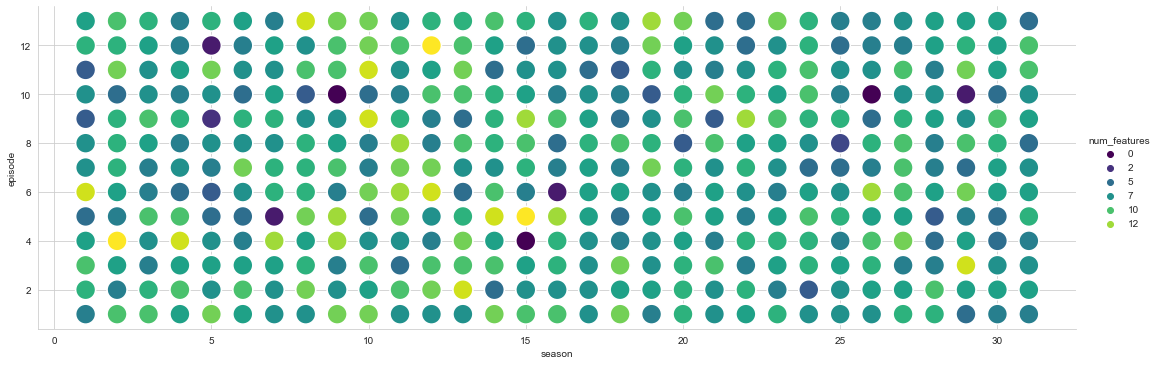

In [87]:
sns.set_style('whitegrid')

sns.relplot( data = episode_info, x='season', y='episode', hue='num_features', 
           aspect=3, s=400, palette='viridis')

plt.show()

In [88]:
episode_info['zero_features'] = np.where( episode_info.num_features == 0, 'ZERO', 'non-zero')

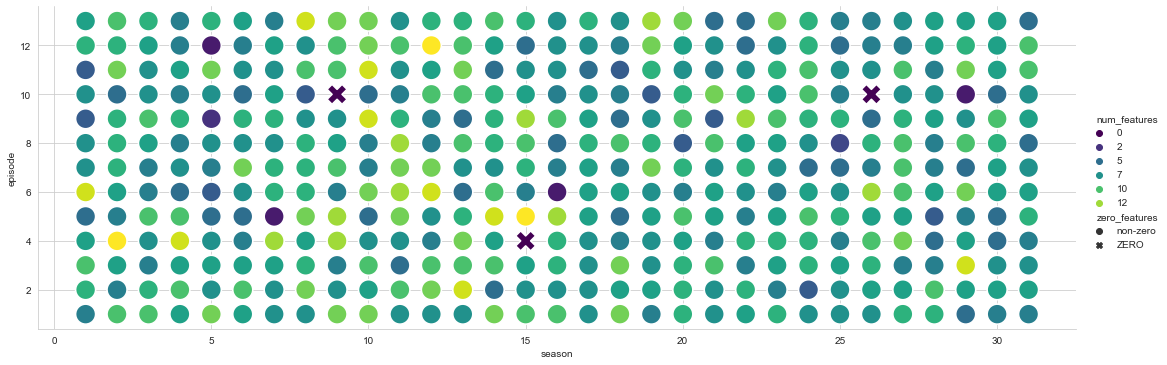

In [89]:
sns.set_style('whitegrid')

sns.relplot( data = episode_info, x='season', y='episode', hue='num_features', style='zero_features',
           aspect=3, s=400, palette='viridis')

plt.show()

### Which artists are associated with ZERO-FEATURES?

In [90]:
episode_info

,season,episode,possible_features,num_features,zero_features
0,1,1,64,6,non-zero
1,1,2,64,9,non-zero
2,1,3,64,10,non-zero
3,1,4,64,8,non-zero
4,1,5,64,5,non-zero
...,...,...,...,...,...
398,31,9,64,8,non-zero
399,31,10,64,7,non-zero
400,31,11,64,10,non-zero
401,31,12,64,10,non-zero


In [91]:
artist_per_episode

,season,episode,artist
0,1,1,BOB_ROSS
1,1,2,BOB_ROSS
2,1,3,BOB_ROSS
3,1,4,BOB_ROSS
4,1,5,BOB_ROSS
...,...,...,...
398,31,9,BOB_ROSS
399,31,10,BOB_ROSS
400,31,11,STEVE_ROSS
401,31,12,BOB_ROSS


### JOIN or MERGE data sets

Data sets can be joined via the `pd.merge()` function or the `.merge()` method associated with a dataframe.

The format is:

`pd.merge(<LEFT data set>, <RIGHT data set>, on=<KEYS>, how=<HOW are they linked?>)`

In [92]:
pd.merge( episode_info, artist_per_episode, on=['season', 'episode'], how='left' )

,season,episode,possible_features,num_features,zero_features,artist
0,1,1,64,6,non-zero,BOB_ROSS
1,1,2,64,9,non-zero,BOB_ROSS
2,1,3,64,10,non-zero,BOB_ROSS
3,1,4,64,8,non-zero,BOB_ROSS
4,1,5,64,5,non-zero,BOB_ROSS
...,...,...,...,...,...,...
398,31,9,64,8,non-zero,BOB_ROSS
399,31,10,64,7,non-zero,BOB_ROSS
400,31,11,64,10,non-zero,STEVE_ROSS
401,31,12,64,10,non-zero,BOB_ROSS


In [93]:
episode_info_left = pd.merge( episode_info, artist_per_episode, on=['season', 'episode'], how='left' )

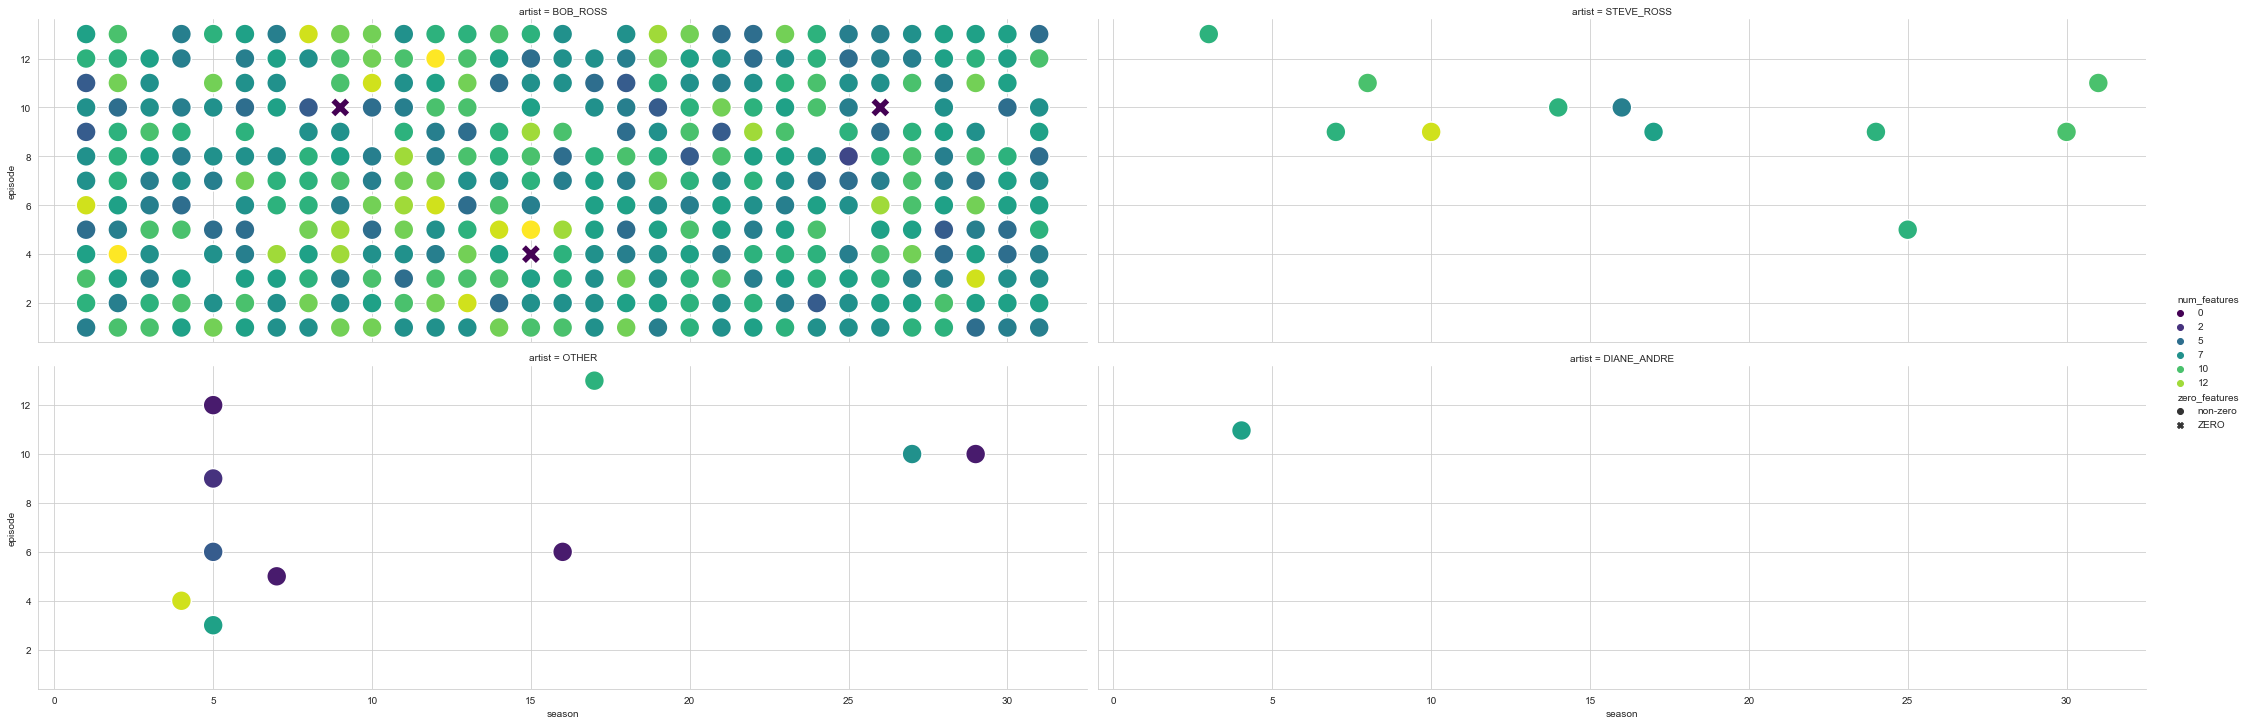

In [94]:
sns.relplot( data = episode_info_left, x='season', y='episode', hue='num_features', style='zero_features', 
            col='artist', col_wrap=2,
           aspect=3, s=400, palette='viridis')

plt.show()

Create a user defined function to count the number of zero-feature paintings.

In [95]:
def find_zero_features(zv):
    return zv.isin(['ZERO']).sum()

In [96]:
find_zero_features

<function __main__.find_zero_features(zv)>

In [97]:
episode_info_left.zero_features.isin(['ZERO']).sum()

3

In [98]:
artist_per_season = episode_info_left.groupby(['season', 'artist']).\
aggregate(num_episodes = ('episode', 'nunique'),
         in_episodes = ('episode', 'unique'),
         min_features = ('num_features', 'min'),
         max_features = ('num_features', 'max'),
         avg_features = ('num_features', 'mean'),
         count_zero_features = ('zero_features', find_zero_features)).\
reset_index()

In [99]:
artist_per_season

,season,artist,num_episodes,in_episodes,min_features,max_features,avg_features,count_zero_features
0,1,BOB_ROSS,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",4,13,7.461538,0
1,2,BOB_ROSS,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",5,14,8.769231,0
2,3,BOB_ROSS,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",6,10,7.833333,0
3,3,STEVE_ROSS,1,[13],9,9,9.000000,0
4,4,BOB_ROSS,11,"[1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13]",5,10,7.363636,0
5,4,DIANE_ANDRE,1,[11],8,8,8.000000,0
6,4,OTHER,1,[4],13,13,13.000000,0
7,5,BOB_ROSS,9,"[1, 2, 4, 5, 7, 8, 10, 11, 13]",5,11,7.777778,0
8,5,OTHER,4,"[3, 6, 9, 12]",1,8,3.750000,0
9,6,BOB_ROSS,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",5,11,7.461538,0


### Correct the long-format present features

Remember when we removed all features NOT present...we lost episodes. Let's use JOINS to restore those episodes into the data set.

Use the `artist_per_episode` data set and the `present_features` data set.

In [100]:
artist_per_episode

,season,episode,artist
0,1,1,BOB_ROSS
1,1,2,BOB_ROSS
2,1,3,BOB_ROSS
3,1,4,BOB_ROSS
4,1,5,BOB_ROSS
...,...,...,...
398,31,9,BOB_ROSS
399,31,10,BOB_ROSS
400,31,11,STEVE_ROSS
401,31,12,BOB_ROSS


In [101]:
present_features

,season,episode,feature,value
0,1,1,BUSHES,1
1,1,1,DECIDUOUS,1
2,1,1,GRASS,1
3,1,1,RIVER,1
4,1,1,TREE,1
...,...,...,...,...
3182,31,13,DECIDUOUS,1
3183,31,13,GRASS,1
3184,31,13,MOUNTAIN,1
3185,31,13,TREE,1


#### LEFT-JOIN

The larger data set (based on rows) will be the LEFT data set.

In [102]:
left_join_df = pd.merge( present_features, artist_per_episode, on=['season', 'episode'], how='left')

In [103]:
left_join_df

,season,episode,feature,value,artist
0,1,1,BUSHES,1,BOB_ROSS
1,1,1,DECIDUOUS,1,BOB_ROSS
2,1,1,GRASS,1,BOB_ROSS
3,1,1,RIVER,1,BOB_ROSS
4,1,1,TREE,1,BOB_ROSS
...,...,...,...,...,...
3182,31,13,DECIDUOUS,1,BOB_ROSS
3183,31,13,GRASS,1,BOB_ROSS
3184,31,13,MOUNTAIN,1,BOB_ROSS
3185,31,13,TREE,1,BOB_ROSS


#### RIGHT-JOIN

In [104]:
right_join_df = pd.merge( present_features, artist_per_episode, on=['season', 'episode'], how='right')

In [105]:
right_join_df

,season,episode,feature,value,artist
0,1,1,BUSHES,1.0,BOB_ROSS
1,1,1,DECIDUOUS,1.0,BOB_ROSS
2,1,1,GRASS,1.0,BOB_ROSS
3,1,1,RIVER,1.0,BOB_ROSS
4,1,1,TREE,1.0,BOB_ROSS
...,...,...,...,...,...
3185,31,13,DECIDUOUS,1.0,BOB_ROSS
3186,31,13,GRASS,1.0,BOB_ROSS
3187,31,13,MOUNTAIN,1.0,BOB_ROSS
3188,31,13,TREE,1.0,BOB_ROSS


In [106]:
right_join_df.isna().sum()

season     0
episode    0
feature    3
value      3
artist     0
dtype: int64

In [107]:
right_join_df.loc[ (right_join_df.season == 9) & (right_join_df.episode.isin([8, 9, 10, 11, 12]))]

,season,episode,feature,value,artist
874,9,8,CABIN,1.0,BOB_ROSS
875,9,8,DECIDUOUS,1.0,BOB_ROSS
876,9,8,FENCE,1.0,BOB_ROSS
877,9,8,MOUNTAIN,1.0,BOB_ROSS
878,9,8,PATH,1.0,BOB_ROSS
879,9,8,STRUCTURE,1.0,BOB_ROSS
880,9,8,TREE,1.0,BOB_ROSS
881,9,8,TREES,1.0,BOB_ROSS
882,9,9,BUSHES,1.0,BOB_ROSS
883,9,9,CLOUDS,1.0,BOB_ROSS


#### INNER-JOIN

In [108]:
inner_join_df = pd.merge( present_features, artist_per_episode, on=['season', 'episode'], how='inner')

In [109]:
inner_join_df

,season,episode,feature,value,artist
0,1,1,BUSHES,1,BOB_ROSS
1,1,1,DECIDUOUS,1,BOB_ROSS
2,1,1,GRASS,1,BOB_ROSS
3,1,1,RIVER,1,BOB_ROSS
4,1,1,TREE,1,BOB_ROSS
...,...,...,...,...,...
3182,31,13,DECIDUOUS,1,BOB_ROSS
3183,31,13,GRASS,1,BOB_ROSS
3184,31,13,MOUNTAIN,1,BOB_ROSS
3185,31,13,TREE,1,BOB_ROSS


In [110]:
inner_join_df.equals( left_join_df )

True

#### OUTER-JOIN

In [111]:
outer_join_df = pd.merge( present_features, artist_per_episode, on=['season', 'episode'], how='outer')

In [112]:
outer_join_df

,season,episode,feature,value,artist
0,1,1,BUSHES,1.0,BOB_ROSS
1,1,1,DECIDUOUS,1.0,BOB_ROSS
2,1,1,GRASS,1.0,BOB_ROSS
3,1,1,RIVER,1.0,BOB_ROSS
4,1,1,TREE,1.0,BOB_ROSS
...,...,...,...,...,...
3185,31,13,TREE,1.0,BOB_ROSS
3186,31,13,TREES,1.0,BOB_ROSS
3187,9,10,NaN,NaN,BOB_ROSS
3188,15,4,NaN,NaN,BOB_ROSS


In [113]:
### sort the outer join rows

outer_join_df.sort_values(['season', 'episode'], inplace=True)

outer_join_df.reset_index(drop=True, inplace=True)

In [114]:
outer_join_df.equals( right_join_df )

True

### Final tidy features data set

In [115]:
outer_join_df

,season,episode,feature,value,artist
0,1,1,BUSHES,1.0,BOB_ROSS
1,1,1,DECIDUOUS,1.0,BOB_ROSS
2,1,1,GRASS,1.0,BOB_ROSS
3,1,1,RIVER,1.0,BOB_ROSS
4,1,1,TREE,1.0,BOB_ROSS
...,...,...,...,...,...
3185,31,13,DECIDUOUS,1.0,BOB_ROSS
3186,31,13,GRASS,1.0,BOB_ROSS
3187,31,13,MOUNTAIN,1.0,BOB_ROSS
3188,31,13,TREE,1.0,BOB_ROSS


Drop the now redundant `value` column

In [116]:
episodes_lf = outer_join_df.copy().drop(columns=['value'])

In [117]:
episodes_lf

,season,episode,feature,artist
0,1,1,BUSHES,BOB_ROSS
1,1,1,DECIDUOUS,BOB_ROSS
2,1,1,GRASS,BOB_ROSS
3,1,1,RIVER,BOB_ROSS
4,1,1,TREE,BOB_ROSS
...,...,...,...,...
3185,31,13,DECIDUOUS,BOB_ROSS
3186,31,13,GRASS,BOB_ROSS
3187,31,13,MOUNTAIN,BOB_ROSS
3188,31,13,TREE,BOB_ROSS


In [118]:
episodes_lf.groupby(['season', 'episode']).size().reset_index(name='num_rows').season.value_counts().value_counts()

13    31
Name: season, dtype: int64

In [119]:
episodes_lf.groupby(['season', 'episode']).size().reset_index(name='num_rows').episode.value_counts().value_counts()

31    13
Name: episode, dtype: int64

## Summarize each episode

In [120]:
def find_missing_features(fname):
    return fname.isna().any()

In [121]:
episode_summary = episodes_lf.groupby(['season', 'episode', 'artist']).\
aggregate(num_features = ('feature', 'nunique'),
         missing_features = ('feature', find_missing_features)).\
reset_index()

In [122]:
episode_summary

,season,episode,artist,num_features,missing_features
0,1,1,BOB_ROSS,6,False
1,1,2,BOB_ROSS,9,False
2,1,3,BOB_ROSS,10,False
3,1,4,BOB_ROSS,8,False
4,1,5,BOB_ROSS,5,False
...,...,...,...,...,...
398,31,9,BOB_ROSS,8,False
399,31,10,BOB_ROSS,7,False
400,31,11,STEVE_ROSS,10,False
401,31,12,BOB_ROSS,10,False


In [123]:
episode_summary.loc[ episode_summary.missing_features > 0 ]

,season,episode,artist,num_features,missing_features
113,9,10,BOB_ROSS,0,True
185,15,4,BOB_ROSS,0,True
334,26,10,BOB_ROSS,0,True


In [124]:
artist_info

,artist,sum_value,num_episodes,num_seasons,first_season,last_season
0,BOB_ROSS,381,381,31,1,31
1,DIANE_ANDRE,1,1,1,4,4
2,OTHER,10,10,7,4,29
3,STEVE_ROSS,11,11,11,3,31


Let's define "nicer" printable full names for each artist.

In [125]:
artist_info['artist_name'] = ['Bob Ross', 'Diane Andre', 'Other', 'Steve Ross']

artist_info['artist_relationship'] = ['Himself', 'Friend', 'Friends', 'Son']

In [126]:
artist_info

,artist,sum_value,num_episodes,num_seasons,first_season,last_season,artist_name,artist_relationship
0,BOB_ROSS,381,381,31,1,31,Bob Ross,Himself
1,DIANE_ANDRE,1,1,1,4,4,Diane Andre,Friend
2,OTHER,10,10,7,4,29,Other,Friends
3,STEVE_ROSS,11,11,11,3,31,Steve Ross,Son


In [127]:
episodes_lf.merge( artist_info.loc[:, ['artist', 'artist_name', 'artist_relationship']], on='artist', how='left' )

,season,episode,feature,artist,artist_name,artist_relationship
0,1,1,BUSHES,BOB_ROSS,Bob Ross,Himself
1,1,1,DECIDUOUS,BOB_ROSS,Bob Ross,Himself
2,1,1,GRASS,BOB_ROSS,Bob Ross,Himself
3,1,1,RIVER,BOB_ROSS,Bob Ross,Himself
4,1,1,TREE,BOB_ROSS,Bob Ross,Himself
...,...,...,...,...,...,...
3185,31,13,DECIDUOUS,BOB_ROSS,Bob Ross,Himself
3186,31,13,GRASS,BOB_ROSS,Bob Ross,Himself
3187,31,13,MOUNTAIN,BOB_ROSS,Bob Ross,Himself
3188,31,13,TREE,BOB_ROSS,Bob Ross,Himself


In [128]:
episodes_lf.merge( artist_info.loc[:, ['artist', 'artist_name', 'artist_relationship']], on='artist', how='right' )

,season,episode,feature,artist,artist_name,artist_relationship
0,1,1,BUSHES,BOB_ROSS,Bob Ross,Himself
1,1,1,DECIDUOUS,BOB_ROSS,Bob Ross,Himself
2,1,1,GRASS,BOB_ROSS,Bob Ross,Himself
3,1,1,RIVER,BOB_ROSS,Bob Ross,Himself
4,1,1,TREE,BOB_ROSS,Bob Ross,Himself
...,...,...,...,...,...,...
3185,31,11,MOUNTAIN,STEVE_ROSS,Steve Ross,Son
3186,31,11,MOUNTAINS,STEVE_ROSS,Steve Ross,Son
3187,31,11,SNOWY_MOUNTAIN,STEVE_ROSS,Steve Ross,Son
3188,31,11,TREE,STEVE_ROSS,Steve Ross,Son


In [129]:
episodes_lf.merge( artist_info.loc[:, ['artist', 'artist_name', 'artist_relationship']], on='artist', how='inner' )

,season,episode,feature,artist,artist_name,artist_relationship
0,1,1,BUSHES,BOB_ROSS,Bob Ross,Himself
1,1,1,DECIDUOUS,BOB_ROSS,Bob Ross,Himself
2,1,1,GRASS,BOB_ROSS,Bob Ross,Himself
3,1,1,RIVER,BOB_ROSS,Bob Ross,Himself
4,1,1,TREE,BOB_ROSS,Bob Ross,Himself
...,...,...,...,...,...,...
3185,4,11,MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend
3186,4,11,MOUNTAINS,DIANE_ANDRE,Diane Andre,Friend
3187,4,11,SNOWY_MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend
3188,4,11,TREE,DIANE_ANDRE,Diane Andre,Friend


In [130]:
episodes_lf.merge( artist_info.loc[:, ['artist', 'artist_name', 'artist_relationship']], on='artist', how='outer' )

,season,episode,feature,artist,artist_name,artist_relationship
0,1,1,BUSHES,BOB_ROSS,Bob Ross,Himself
1,1,1,DECIDUOUS,BOB_ROSS,Bob Ross,Himself
2,1,1,GRASS,BOB_ROSS,Bob Ross,Himself
3,1,1,RIVER,BOB_ROSS,Bob Ross,Himself
4,1,1,TREE,BOB_ROSS,Bob Ross,Himself
...,...,...,...,...,...,...
3185,4,11,MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend
3186,4,11,MOUNTAINS,DIANE_ANDRE,Diane Andre,Friend
3187,4,11,SNOWY_MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend
3188,4,11,TREE,DIANE_ANDRE,Diane Andre,Friend


### Export data for use in hw04

In [131]:
ross_episodes_lf = episodes_lf.merge( artist_info.loc[:, ['artist', 'artist_name', 'artist_relationship']], on='artist', how='outer' )

In [135]:
ross_episodes_lf.to_csv('../ross_episodes_tidy.csv', index=False, na_rep='NULL')
ross_episodes_lf

,season,episode,feature,artist,artist_name,artist_relationship
0,1,1,BUSHES,BOB_ROSS,Bob Ross,Himself
1,1,1,DECIDUOUS,BOB_ROSS,Bob Ross,Himself
2,1,1,GRASS,BOB_ROSS,Bob Ross,Himself
3,1,1,RIVER,BOB_ROSS,Bob Ross,Himself
4,1,1,TREE,BOB_ROSS,Bob Ross,Himself
...,...,...,...,...,...,...
3185,4,11,MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend
3186,4,11,MOUNTAINS,DIANE_ANDRE,Diane Andre,Friend
3187,4,11,SNOWY_MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend
3188,4,11,TREE,DIANE_ANDRE,Diane Andre,Friend


In [133]:
df_titles = df_copy[['season', 'episode', 'TITLE']].copy()

In [136]:
df_titles.to_csv('../ross_titles.csv', index=False, na_rep='NULL')
df_titles

,season,episode,TITLE
0,1,1,"""A WALK IN THE WOODS"""
1,1,2,"""MT. MCKINLEY"""
2,1,3,"""EBONY SUNSET"""
3,1,4,"""WINTER MIST"""
4,1,5,"""QUIET STREAM"""
...,...,...,...
398,31,9,"""EVERGREEN VALLEY"""
399,31,10,"""BALMY BEACH"""
400,31,11,"""LAKE AT THE RIDGE"""
401,31,12,"""IN THE MIDST OF WINTER"""


In [138]:
complete_df = pd.merge( ross_episodes_lf, df_titles, on=['season', 'episode'], how='left')
complete_df

,season,episode,feature,artist,artist_name,artist_relationship,TITLE
0,1,1,BUSHES,BOB_ROSS,Bob Ross,Himself,"""A WALK IN THE WOODS"""
1,1,1,DECIDUOUS,BOB_ROSS,Bob Ross,Himself,"""A WALK IN THE WOODS"""
2,1,1,GRASS,BOB_ROSS,Bob Ross,Himself,"""A WALK IN THE WOODS"""
3,1,1,RIVER,BOB_ROSS,Bob Ross,Himself,"""A WALK IN THE WOODS"""
4,1,1,TREE,BOB_ROSS,Bob Ross,Himself,"""A WALK IN THE WOODS"""
...,...,...,...,...,...,...,...
3185,4,11,MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend,"""NORTHWEST MAJESTY"""
3186,4,11,MOUNTAINS,DIANE_ANDRE,Diane Andre,Friend,"""NORTHWEST MAJESTY"""
3187,4,11,SNOWY_MOUNTAIN,DIANE_ANDRE,Diane Andre,Friend,"""NORTHWEST MAJESTY"""
3188,4,11,TREE,DIANE_ANDRE,Diane Andre,Friend,"""NORTHWEST MAJESTY"""


In [142]:
complete_df.rename(columns={'TITLE':'title'}, inplace=True)

In [143]:
complete_df['title'] = complete_df['title'].str.replace(r"[\"\',]", '')

In [144]:
final_tidy = complete_df[['season','episode','title','feature','artist_name','artist_relationship']].copy()
final_tidy

,season,episode,title,feature,artist_name,artist_relationship
0,1,1,A WALK IN THE WOODS,BUSHES,Bob Ross,Himself
1,1,1,A WALK IN THE WOODS,DECIDUOUS,Bob Ross,Himself
2,1,1,A WALK IN THE WOODS,GRASS,Bob Ross,Himself
3,1,1,A WALK IN THE WOODS,RIVER,Bob Ross,Himself
4,1,1,A WALK IN THE WOODS,TREE,Bob Ross,Himself
...,...,...,...,...,...,...
3185,4,11,NORTHWEST MAJESTY,MOUNTAIN,Diane Andre,Friend
3186,4,11,NORTHWEST MAJESTY,MOUNTAINS,Diane Andre,Friend
3187,4,11,NORTHWEST MAJESTY,SNOWY_MOUNTAIN,Diane Andre,Friend
3188,4,11,NORTHWEST MAJESTY,TREE,Diane Andre,Friend
